In [2]:
import numpy as np
import matplotlib.pyplot as plt


# **Q1**


In [7]:
def f(x):
    return (x - 1) * np.exp(x) * np.sin(x)

def simpsons(a, b, n):
    h = (b - a) / n
    func = f(a) + f(b)
    for i in range(1, n, 2):
        func += 4 * f(a + i * h)
    for i in range(2, n-1, 2):
        func += 2 * f(a + i * h)
    func *= (h / 3)
    return func

def trapezoidal(a, b, n):
    h = (b - a) / n
    func = f(a) + f(b)
    for i in range(1, n):
        func += 2 * f(a + i * h)
    func *= (h / 2)
    return func

def gauss_quadrature(a, b, n):
    if n == 1:
        xi, wi = np.array([0]), np.array([2])
    elif n == 2:
        xi, wi = np.array([1 / np.sqrt(3), -1 / np.sqrt(3)]), np.array([1, 1])
    elif n == 3:
        xi, wi = np.array([0, np.sqrt(3/5), -np.sqrt(3/5)]), np.array([8/9, 5/9, 5/9])
    elif n == 4: 
        xi, wi = np.array([np.sqrt((3/7) - (2/7)*np.sqrt(6/5)), 
                           -np.sqrt((3/7) - (2/7)*np.sqrt(6/5)), 
                           np.sqrt((3/7) + (2/7)*np.sqrt(6/5)),
                           -np.sqrt((3/7) + (2/7)*np.sqrt(6/5))
                           ]), np.array([
                               (18 + np.sqrt(30)) / 36,
                               (18 + np.sqrt(30)) / 36,
                               (18 - np.sqrt(30)) / 36,
                               (18 - np.sqrt(30)) / 36
                           ])
    elif n == 5:
        xi, wi = np.array([0,
                           (1/3) * np.sqrt(5 - 2 * np.sqrt(10/7)),
                            -(1/3) * np.sqrt(5 - 2 * np.sqrt(10/7)),
                            (1/3) * np.sqrt(5 + 2 * np.sqrt(10/7)),
                            -(1/3) * np.sqrt(5 + 2 * np.sqrt(10/7))
                            ]), np.array([
                               128/225,
                               (322 + 113 * np.sqrt(70)) / 900,
                               (322 + 113 * np.sqrt(70)) / 900,
                               (322 - 113 * np.sqrt(70)) / 900,
                               (322 - 113 * np.sqrt(70)) / 900
                            ])
        
    func = 0
    for i, x in enumerate(xi):
        w = wi[i]
        transformed_x = (b - a) / 2 * x + (b + a) / 2
        func += w * f(transformed_x)
    #transform intervel
    func *= (b - a) / 2
    return func

    

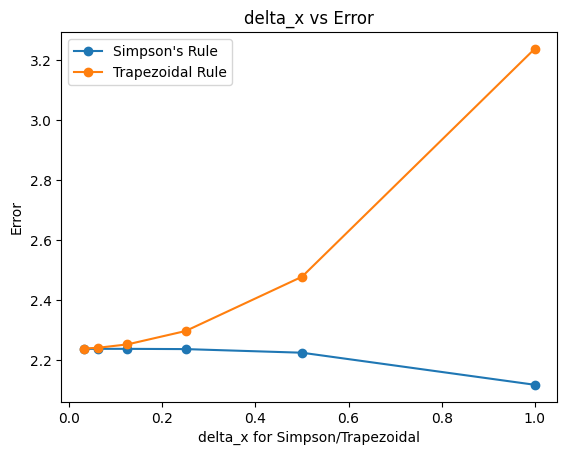

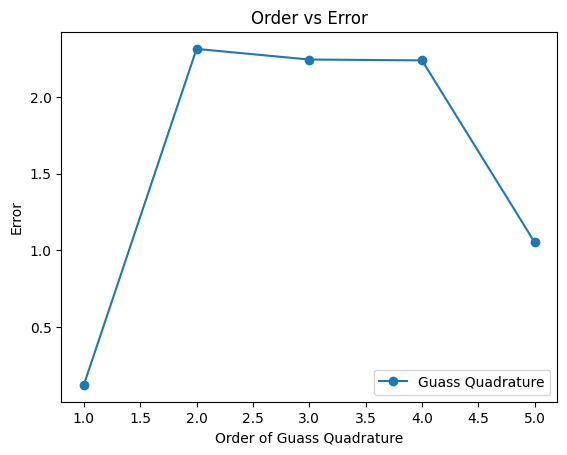

In [11]:
dx_values = [1, 0.5, 0.25, 0.125, 0.0625, 0.03125]
num_points = [1, 2, 3, 4, 5]
a = 0 
b = 2
exact_value = 0.1220
errors_simpson = []
errors_trap = []
errors_gauss = []

for dx in dx_values:
    n = int(2 / dx)
    simpson_result = simpsons(a, b, n)
    trap_result = trapezoidal(a, b, n)

    errors_simpson.append(abs(simpson_result - exact_value))
    errors_trap.append(abs(trap_result - exact_value))

for num in num_points:
    gauss_result = gauss_quadrature(a, b, num)
    errors_gauss.append(abs(gauss_result - exact_value))

plt.figure()
plt.plot(dx_values, errors_simpson, label="Simpson's Rule", marker='o')
plt.plot(dx_values, errors_trap, label="Trapezoidal Rule", marker='o')
plt.xlabel('delta_x for Simpson/Trapezoidal')
plt.ylabel('Error')
plt.title('delta_x vs Error')
plt.legend()
plt.show()

plt.figure()
plt.plot(num_points, errors_gauss, label="Guass Quadrature", marker='o')
plt.xlabel('Order of Guass Quadrature')
plt.ylabel('Error')
plt.title('Order vs Error')
plt.legend()
plt.show()

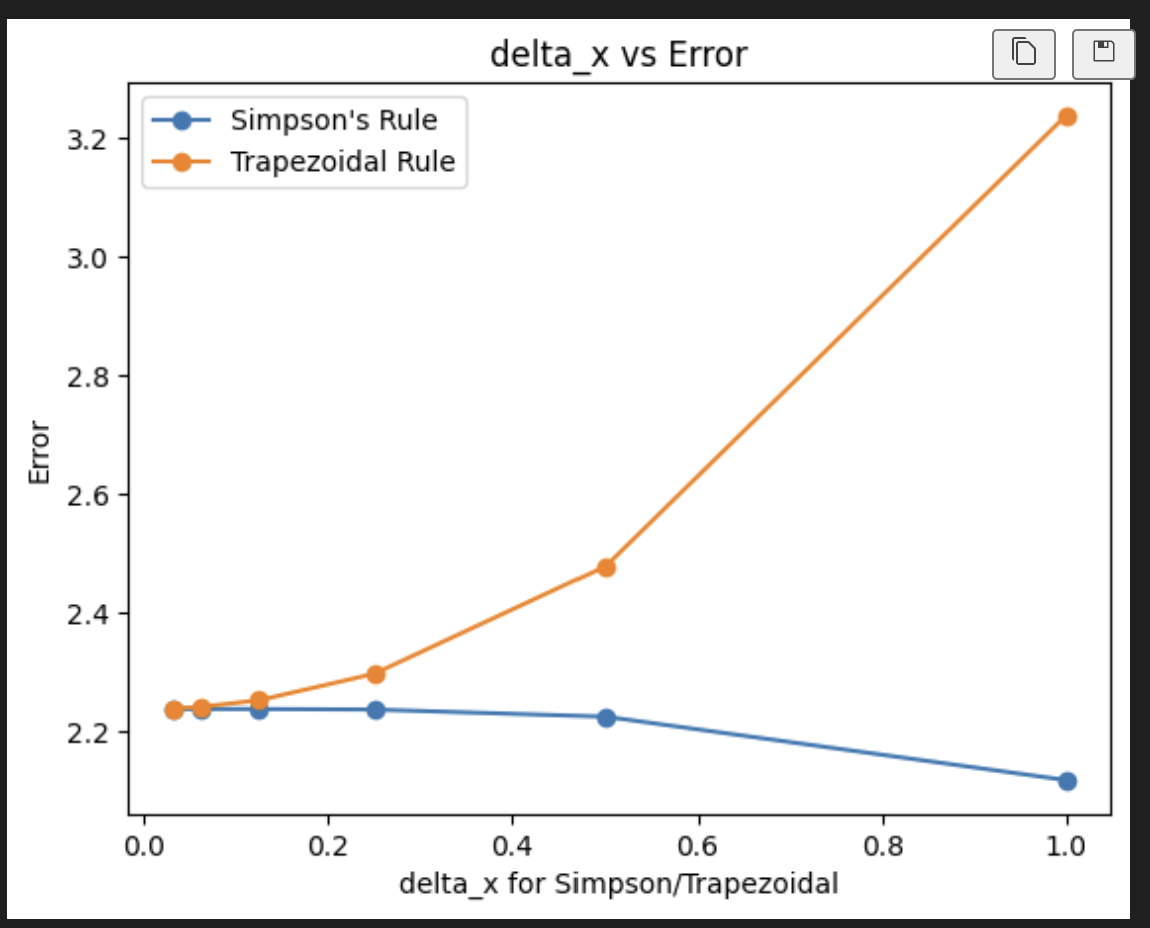
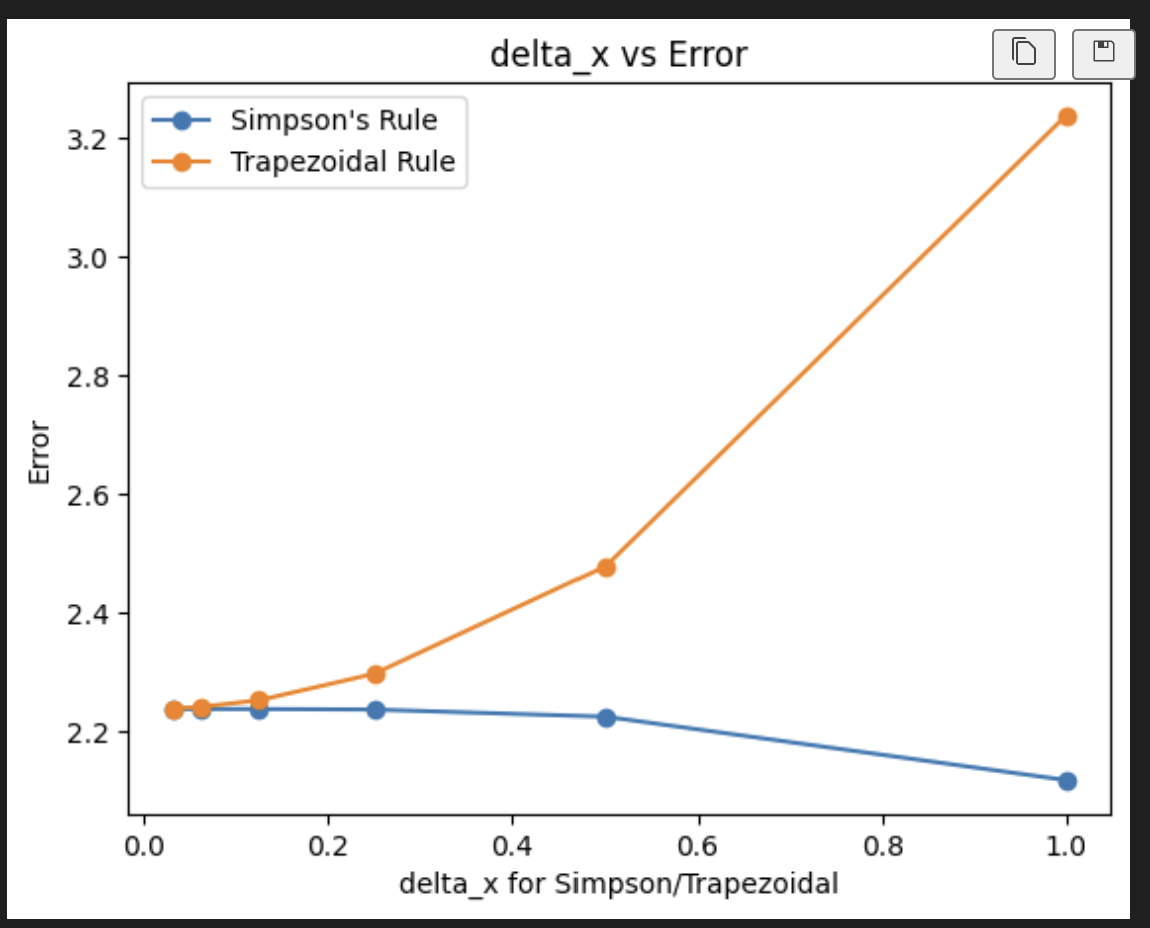

# **Q2**

a)

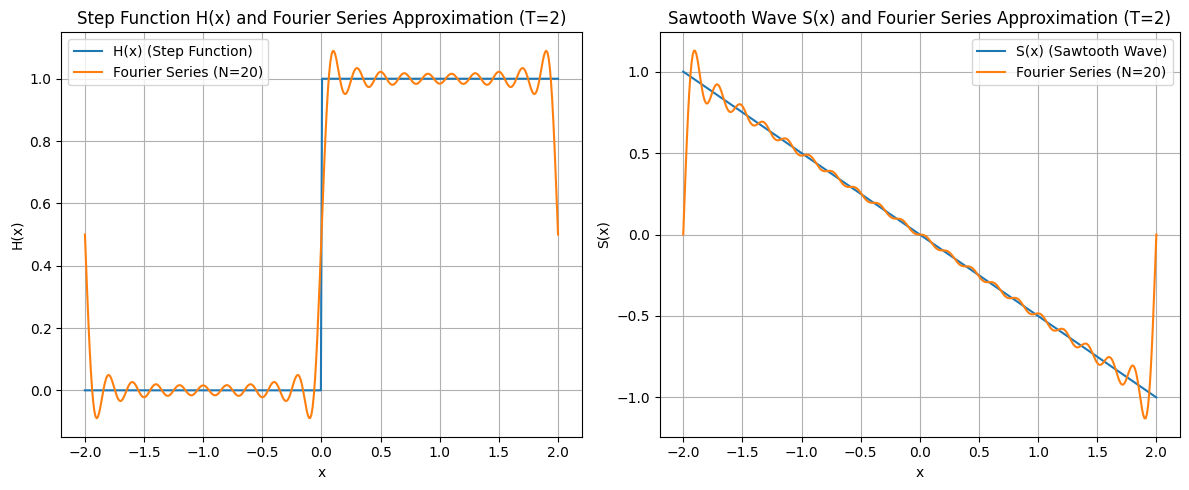

In [41]:

x_values = np.linspace(-2, 2, 400)

def H(x):
    return np.where(x > 0, 1, 0)

def fourier_H(x, N):
    result = 0.5 #a0 /2
    for k in range(1, N+1, 2): 
        #result += (2 / (k * np.pi)) * np.sin(np.pi * k * x)  
        result += (2 / (k * np.pi)) * np.sin((np.pi * k * x) / 2)
    return result

def S(x):
    return -x/2

def fourier_S(x, N):
    result = np.zeros_like(x)
    for k in range(1, N+1):
        #result += (2 / (k * np.pi)) * np.sin((np.pi * k * x) / 1)
        #result += (2 / (k * np.pi)) * np.sin((np.pi * k * x) / 2)
        result += (2 / (k * np.pi)) * np.sin((np.pi * k * (x + 2)) / 2)
    return result

N = 20

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(x_values, H(x_values), label='H(x) (Step Function)')
plt.plot(x_values, fourier_H(x_values, N), label=f'Fourier Series (N={N})')
plt.title('Step Function H(x) and Fourier Series Approximation (T=2)')
plt.xlabel('x')
plt.ylabel('H(x)')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(x_values, S(x_values), label='S(x) (Sawtooth Wave)')
plt.plot(x_values, fourier_S(x_values, N), label=f'Fourier Series (N={N})')
plt.title('Sawtooth Wave S(x) and Fourier Series Approximation (T=2)')
plt.xlabel('x')
plt.ylabel('S(x)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


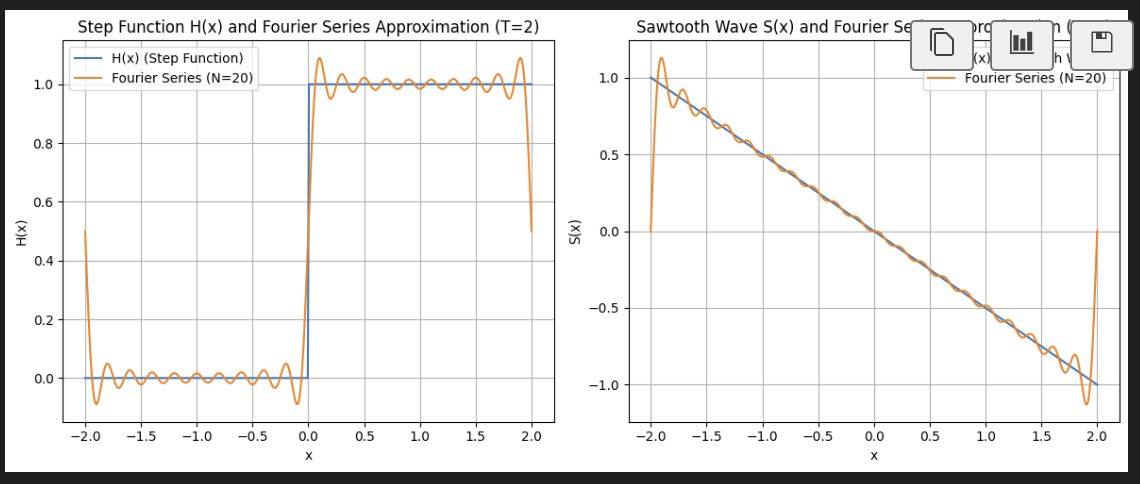

b)

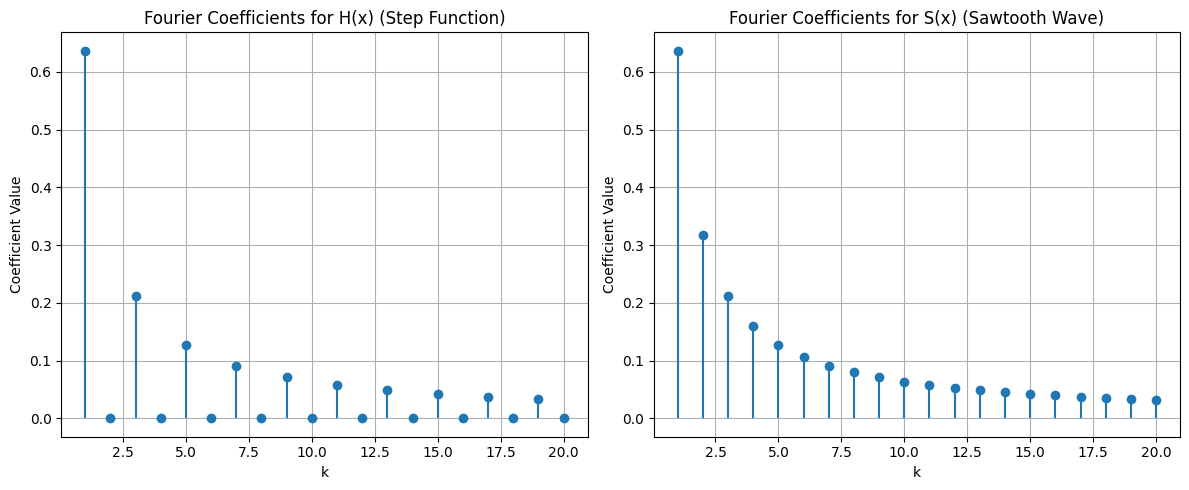

In [32]:
def H_fourier_coefficients(k):
    if k % 2 != 0: 
        return 2 / (k * np.pi)
    else:
        return 0

def S_fourier_coefficients(k):
    return 2 / (k * np.pi)

k_values = np.arange(1, N+1)
H_coefficients = np.array([H_fourier_coefficients(k) for k in k_values])
S_coefficients = np.array([S_fourier_coefficients(k) for k in k_values])

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.stem(k_values, H_coefficients, basefmt=" ")
plt.title('Fourier Coefficients for H(x) (Step Function)')
plt.xlabel('k')
plt.ylabel('Coefficient Value')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.stem(k_values, S_coefficients, basefmt=" ")
plt.title('Fourier Coefficients for S(x) (Sawtooth Wave)')
plt.xlabel('k')
plt.ylabel('Coefficient Value')
plt.grid(True)

plt.tight_layout()
plt.show()

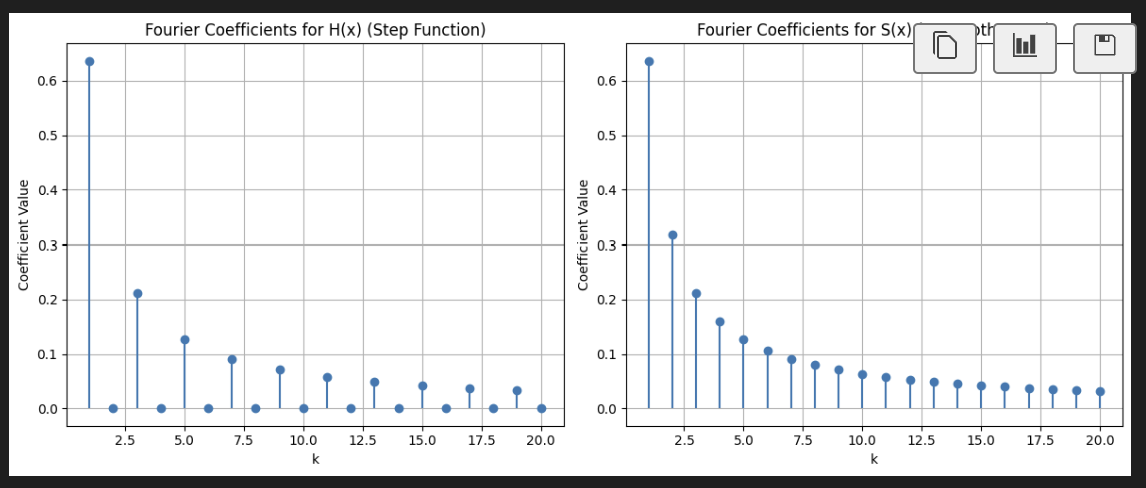

c)

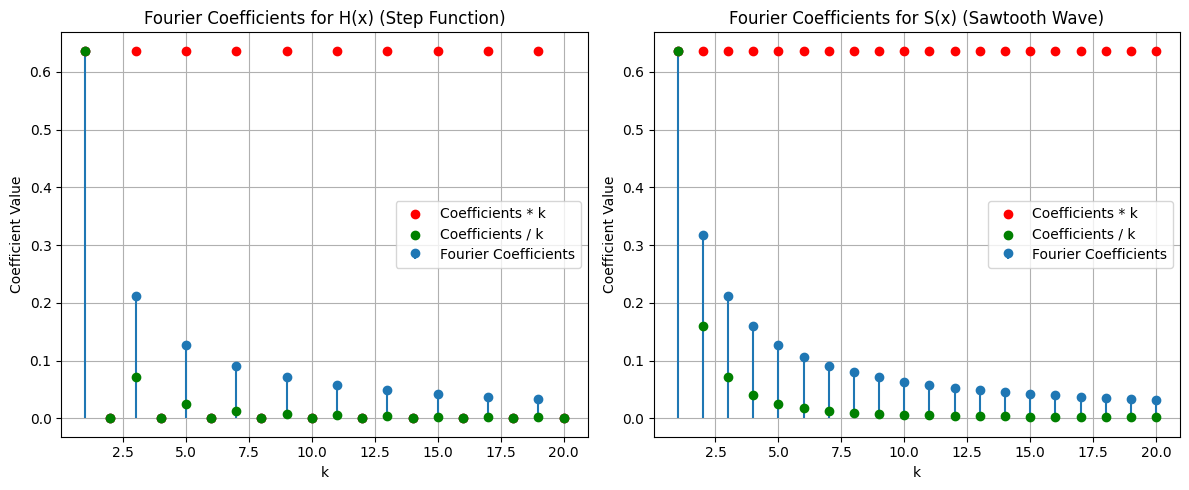

In [33]:
H_coeff_mult_k = H_coefficients * k_values
H_coeff_div_k = H_coefficients / k_values
S_coeff_mult_k = S_coefficients * k_values
S_coeff_div_k = S_coefficients / k_values

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.stem(k_values, H_coefficients, basefmt=" ", label='Fourier Coefficients')
plt.scatter(k_values, H_coeff_mult_k, color='r', label='Coefficients * k', zorder=3)
plt.scatter(k_values, H_coeff_div_k, color='g', label='Coefficients / k', zorder=3)
plt.title('Fourier Coefficients for H(x) (Step Function)')
plt.xlabel('k')
plt.ylabel('Coefficient Value')
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.stem(k_values, S_coefficients, basefmt=" ", label='Fourier Coefficients')
plt.scatter(k_values, S_coeff_mult_k, color='r', label='Coefficients * k', zorder=3)
plt.scatter(k_values, S_coeff_div_k, color='g', label='Coefficients / k', zorder=3)
plt.title('Fourier Coefficients for S(x) (Sawtooth Wave)')
plt.xlabel('k')
plt.ylabel('Coefficient Value')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

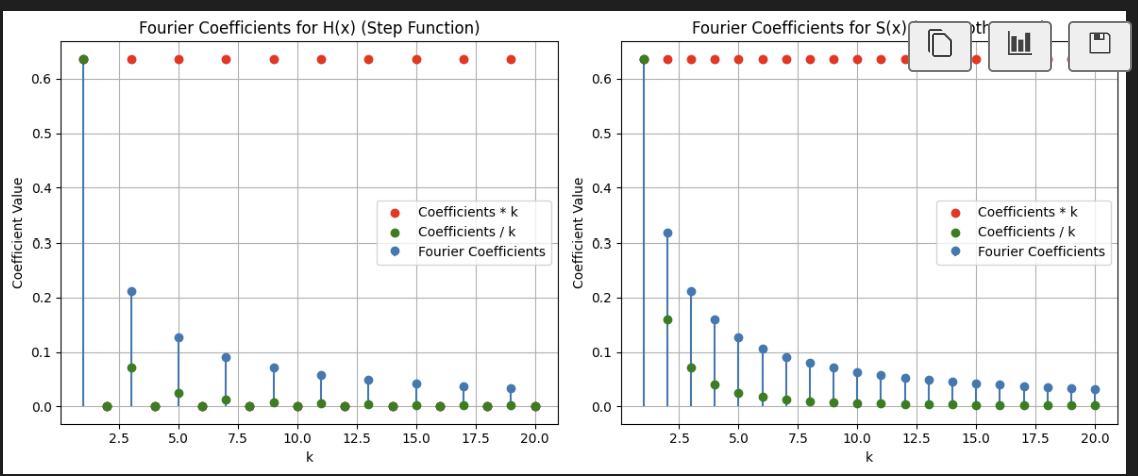

d)

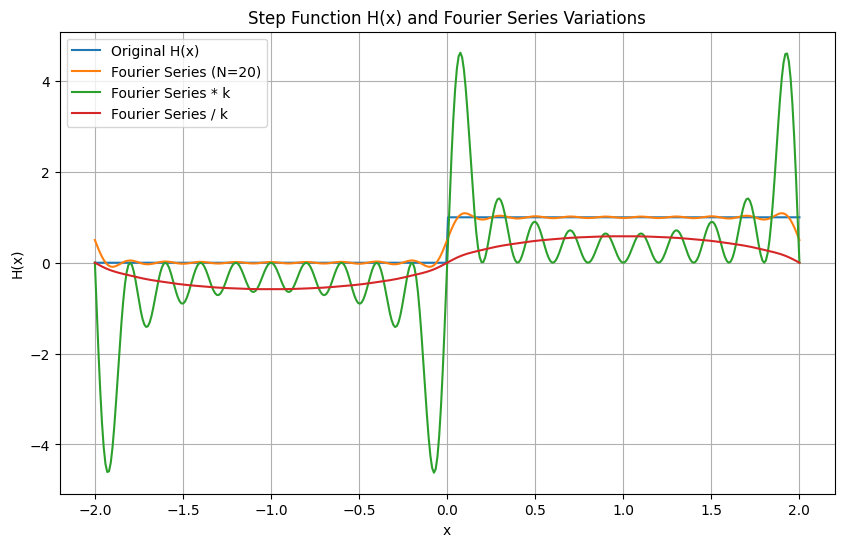

In [40]:

def fourier_H_mult_k(x, N):
    result = np.zeros_like(x)
    for k in range(1, N+1, 2):
        result += (H_fourier_coefficients(k) * k) * np.sin((np.pi * k * x) /2)
    return result

def fourier_H_div_k(x, N):
    result = np.zeros_like(x)
    for k in range(1, N+1, 2):
        result += (H_fourier_coefficients(k) / k) * np.sin((np.pi * k * (x + 0)) /2)
    return result


plt.figure(figsize=(10, 6))
plt.plot(x_values, H(x_values), label='Original H(x)')
plt.plot(x_values, fourier_H(x_values, N), label='Fourier Series (N=20)')
plt.plot(x_values, fourier_H_mult_k(x_values, N), label='Fourier Series * k')
plt.plot(x_values, fourier_H_div_k(x_values, N), label='Fourier Series / k')
plt.title('Step Function H(x) and Fourier Series Variations')
plt.xlabel('x')
plt.ylabel('H(x)')
plt.legend()
plt.grid(True)
plt.show()


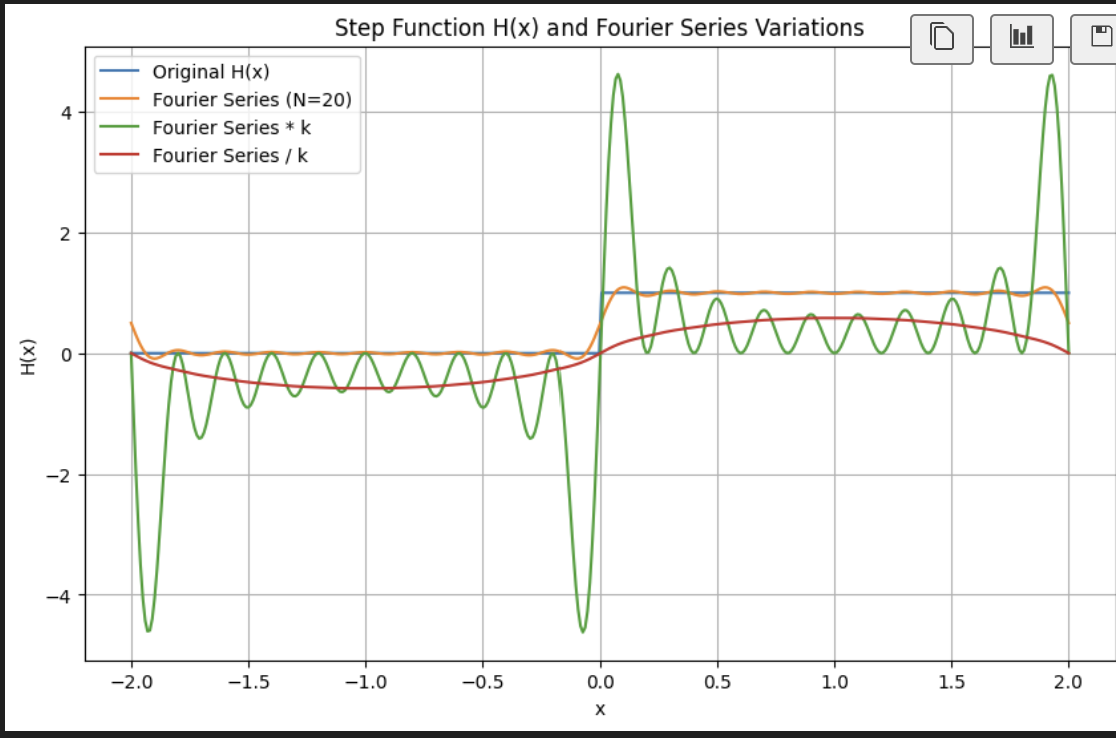

part e)

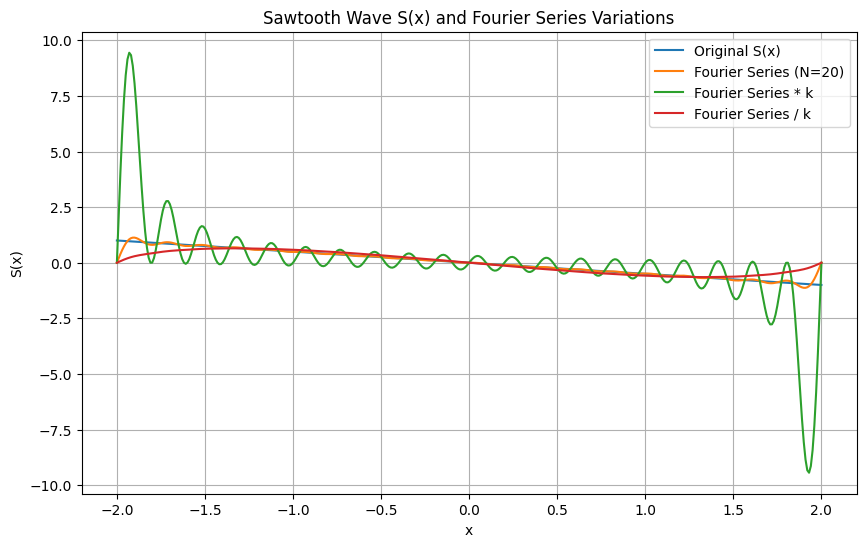

In [39]:

def fourier_S_mult_k(x, N):
    result = np.zeros_like(x)
    for k in range(1, N+1):
        result += (S_fourier_coefficients(k) * k) * np.sin((np.pi * k * (x + 2)) /2)
    return result

def fourier_S_div_k(x, N):
    result = np.zeros_like(x)
    for k in range(1, N+1):
        result += (S_fourier_coefficients(k) / k) * np.sin((np.pi * k * (x + 2)) /2)
    return result

plt.figure(figsize=(10, 6))
plt.plot(x_values, S(x_values), label='Original S(x)')
plt.plot(x_values, fourier_S(x_values, N), label='Fourier Series (N=20)')
plt.plot(x_values, fourier_S_mult_k(x_values, N), label='Fourier Series * k')
plt.plot(x_values, fourier_S_div_k(x_values, N), label='Fourier Series / k')
plt.title('Sawtooth Wave S(x) and Fourier Series Variations')
plt.xlabel('x')
plt.ylabel('S(x)')
plt.legend()
plt.grid(True)
plt.show()

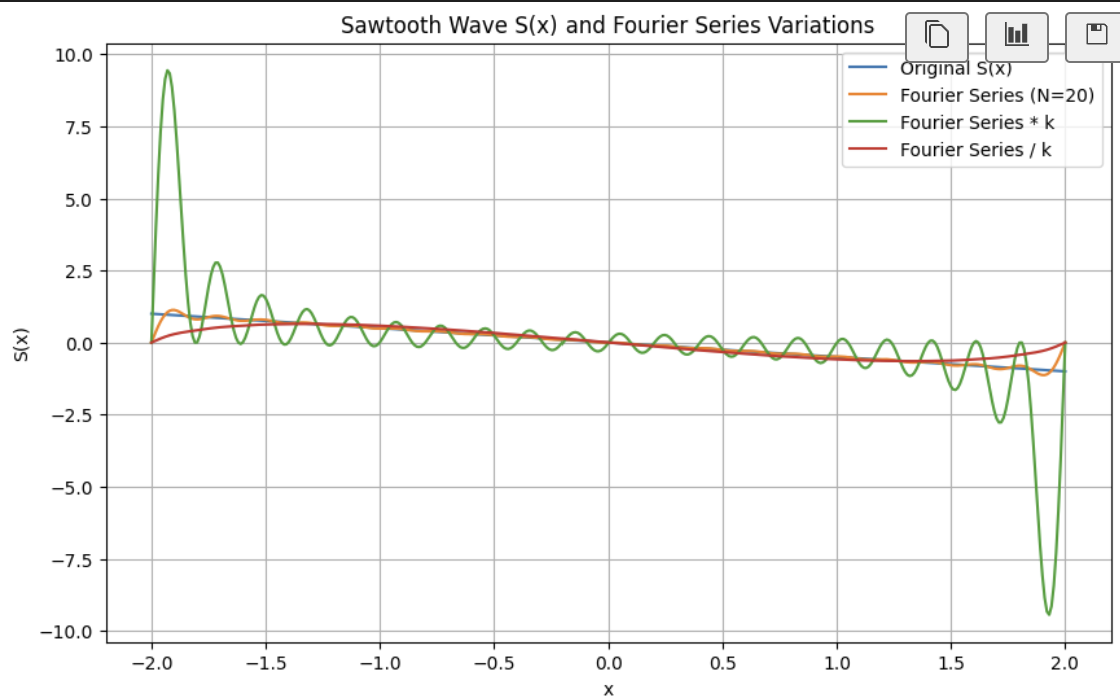

Part f)

When multiplied, the higher freq terms are amplified leading to exaggerated oscillations and sharp features.
When divided, this seems to suppress the higher freq terms making a smoother curve that doesnt fit as well